In [110]:
import random
import numpy as np
import random
from scipy.stats import multivariate_normal

### サンプルデータの生成

In [260]:
N = 1000
X = np.linspace(-1, 1, N).reshape(N, 1)
y = []
sigma = 0.2
for xi in X:
#     if xi < 0:
    if random.randint(0, 1) == 0:
        y.append(-1*xi + random.gauss(0, sigma))
    else:
        y.append(1*xi + random.gauss(0, sigma))            
#     else:
#         if random.randint(0, 3) != 0:
#             y.append(-1*xi + random.gauss(0, sigma))
#         else:
#             y.append(1*xi + random.gauss(0, sigma))
y = np.array(y)

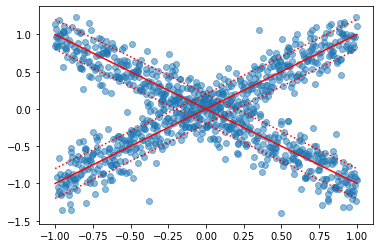

In [262]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6, 4)
import matplotlib.pyplot as plt
plt.scatter(X, y, alpha=0.5)
plt.plot(X, -1*X, color='r')
plt.plot(X, -1*X+sigma, color='r', linestyle=':')
plt.plot(X, -1*X-sigma, color='r', linestyle=':')
plt.plot(X, X, color='r')
plt.plot(X, X+sigma, color='r', linestyle=':')
plt.plot(X, X-sigma, color='r', linestyle=':')

### パラメタ の初期値を作成

In [601]:
# initialize mu_k by randomly selected data points
K = 2
pi = np.array([1/K]*K)
M = X.shape[1]
w = np.random.randn(K, 1+M)
beta = 1 / np.std(y)

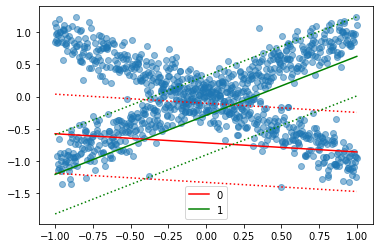

In [602]:
matplotlib.rcParams['figure.figsize'] = (6, 4)
plt.scatter(X, y, alpha=0.5)

# cm = plt.get_cmap(lut=K)
cm = lambda x : 'r' if x == 0 else 'g'
from scipy.stats import multivariate_normal
for k in range(K):
    nb = 10
    xb = np.linspace(-1, 1, nb).reshape(nb, 1)
    xb = np.hstack((np.ones(shape=(xb.shape[0],1)), xb))
    yb = xb.dot(w[k])
    plt.plot(xb[:, 1], yb, label=str(k), color=cm(k))
    plt.plot(xb[:, 1], yb+(1./beta), linestyle=':', color=cm(k))
    plt.plot(xb[:, 1], yb-(1./beta), linestyle=':', color=cm(k))
    plt.legend()

plt.show()

### Eステップ 負担率 rnk の計算

In [613]:
# E step calc rnk
rnk = np.zeros(shape=(N, K))
phi = np.hstack((np.ones(shape=(X.shape[0],1)), X))
for i in range(N):
    norm_const = 0
    xi = phi[i]
    for j in range(K):
        wjXi = xi.dot(w[j])
        norm_const += pi[j] * multivariate_normal(wjXi, np.diag([1/beta])).pdf(y[i])
    for k in range(K):
        wkXi = xi.dot(w[k])
        rnk[i, k] = pi[k] * multivariate_normal(wkXi, np.diag([1/beta])).pdf(y[i]) / norm_const

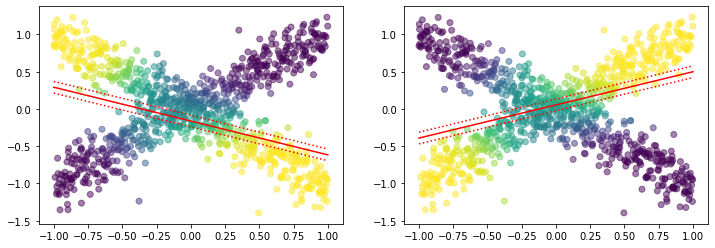

In [614]:

matplotlib.rcParams['figure.figsize'] = (6*K, 4)

from scipy.stats import multivariate_normal
for k in range(K):
    plt.subplot(1, 2, k+1)
    plt.scatter(X[:,0], y[:,0], alpha=0.5, c=rnk[:, k])
    nb = 10
    xb = np.linspace(-1, 1, nb).reshape(nb, 1)
    xb = np.hstack((np.ones(shape=(xb.shape[0],1)), xb))
    yb = xb.dot(w[k])
    plt.plot(xb[:, 1], yb, color='r')
    plt.plot(xb[:, 1], yb+(1./beta), linestyle=':', color='r')
    plt.plot(xb[:, 1], yb-(1./beta), linestyle=':', color='r')

plt.show()

### Mステップ

##### Nk, πk の計算

In [615]:
nk = np.sum(rnk, axis=0)

In [616]:
pi = nk / N

##### w の計算

In [617]:
for k in range(K):
    atrka = np.dot(phi.T, np.diag(rnk[:, k])).dot(phi)
    atrky = np.dot(phi.T, np.diag(rnk[:, k])).dot(y)
    w[k] = np.linalg.inv(atrka).dot(atrky).flatten()

##### beta の計算

In [618]:
beta = 0
for k in range(K):
    beta += phi.dot(w[k]).dot(np.diag(rnk[:,k])).dot(phi.dot(w[k]))

In [619]:
beta = N * (1 / beta)

In [620]:
beta

3.3642871555824136

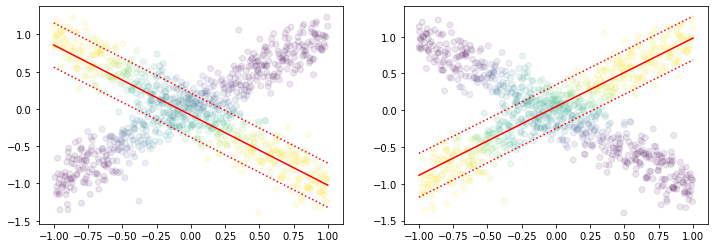

In [621]:
matplotlib.rcParams['figure.figsize'] = (6*K, 4)

from scipy.stats import multivariate_normal
for k in range(K):
    plt.subplot(1, 2, k+1)
    plt.scatter(X[:,0], y[:,0], alpha=0.1, c=rnk[:, k])
    nb = 10
    xb = np.linspace(-1, 1, nb).reshape(nb, 1)
    xb = np.hstack((np.ones(shape=(xb.shape[0],1)), xb))
    yb = xb.dot(w[k])
    plt.plot(xb[:, 1], yb, color='r')
    plt.plot(xb[:, 1], yb+(1./beta), linestyle=':', color='r')
    plt.plot(xb[:, 1], yb-(1./beta), linestyle=':', color='r')

plt.show()

### 尤度関数の計算

In [622]:
likelihood = 0
for i in range(N):
    likelihood_i = 0
    xi = phi[i]
    for j in range(K):
        wjXi = xi.dot(w[j])
        likelihood_i += pi[k] * multivariate_normal(wjXi, np.diag([1/beta])).pdf(y[i])
    likelihood += np.log(likelihood_i)
print(likelihood)

-757.1778662628378
